In [185]:
!python -V

Python 3.9.6


In [186]:
!pip install pandas==1.2.5 pandas_datareader yfinance ipywidgets pandas_market_calendars matplotlib numpy pycorrelate


In [187]:
import os
from datetime import datetime
import concurrent
import pandas_datareader.data as web
import pandas as pd
import datetime
import concurrent.futures
from concurrent.futures import wait, ALL_COMPLETED
import yfinance as yf
import urllib
import urllib.request
import time
from datetime import timedelta

from ipywidgets import interactive
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import pycorrelate as pyc
import seaborn as sns
from yahoofinancials import YahooFinancials

In [188]:
def split_sequences(sequences, n_steps_in, n_steps_out):

    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y)


In [189]:


#frequency = output_variable.value
frequency = "D"

w=117*8
#start = datetime.datetime(2010, 1, 1)

#end = datetime.datetime(2013, 1, 27)
end_date = datetime.date.today()

start_date = end_date - timedelta(weeks=w)

pd.set_option('display.max_columns', None) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', None) #replace n with the number of rows you want to see completely

#cores = int(len(os.sched_getaffinity(0)))

print(end_date)
print(start_date)

#Ultra-Low-Sulfur No. 2 Diesel Fuel Prices: Los Angeles (WDFUELLA)
#US Regular All Formulations Gas Price (GASREGW)
#Trade Weighted U.S. Dollar Index: Broad, Goods and Services (DTWEXBGS)


etf_commodities = ['DBO','CORN', 'WEAT', 'SOYB', 'JO', 'SGG', 'BAL', 'COW', 'MOO', 'TAGS', 'KOL' ]
#Gold, Silver, Platinum, Copper, Paladium, Aluminum, Iron, Steel
etf_metals = ['IAU', 'SLV', 'PGM', 'JJC', 'PALL', 'JJU', 'IFUNX', 'SLX']
#US dollar, European Euro, Japanese yen, Pound sterling, Australian dollar, Canadian dollar, Swiss franc, Chinese Yuan Renminbi, Swedish Krona, Peso, India
#defunct: Russia: XRU, Mexico: FXM
etf_foreign_exchanges = ['UUP','FXE','FXY','FXB','FXA','FXC','FXF','CYB', 'FXS', 'INR']
#residential, Ishares all NAmerica
etf_real_estate = ['REZ', 'IYR']
#Russia, Germany, UK, Japan, China, Euro, Euro, Brazil, Latin America, Mexico, India
etf_economies = ['ERUS','EWG','EWU','EWJ','MCHI','EZU','IEUR','EWZ','ILF','EWW','INDA']
#Ishares Investment Grade, IShares core aggregate Investment grade, Short, Total, 1-5 Years, 5-10 Years, 10 Years, Gov/Credit
#defunct:

etf_spdr_indexes = ['XLC','XLY','XLP','XLE','XLF','XLV','XLI','XLB','XLRE','XLK','XLU']
etf_dow_components = ['MMM','AXP','AMGN','AAPL','BA','CAT','CVX','CSCO','KO','DOW','GS','HD','HON','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT','NKE','PG','CRM','TRV','UNH','VZ','V','WMT','WBA','DIS']

etf_bonds = ['LQD', 'AGG', 'NEAR', 'IUSB', 'ISTB', 'IMTB', 'ILTB', 'GBF']
etf_muni_bonds = ['MUB', 'SUB', 'MEAR']

etf_treasuries = ['AGZ', 'GOVT', 'BIL', 'SHV', 'SHY', 'IEI', 'IEF', 'TLT']

crypto = ['BTC-USD','ETH','RPL','BCH','EOS','LTC']

#,'GOLDAMGBD228NLBM',
FRED_Indicators = ['WDFUELLA','DTWEXBGS','GASREGW','DGS2','CPALTT01USQ657N','PAYEMS','IRLTLT01USM156N','MABMM301USM189S','LFWA64TTUSM647S','MANMM101USA189S','MICH','UMCSENT','CSCICP03USM665S','DGS10','DTB3','DGS3MO','CASTHPI','GDPC1','CIVPART','POPTOTUSA647NWDB','MEHOINUSA672N','HOSMEDUSM052N','MORTGAGE30US','TTLHH','CSUSHPINSA','EMRATIO','CPIAUCSL','PSAVERT','LRUN64TTUSQ156S','USSTHPI','NYSTHPI','M2V','GFDEBTN','DFII10','GFDEGDQ188S','CUSR0000SEHA','ETOTALUSQ176N','ERENTUSQ176N','RECPROUSM156N','T5YIFR','BAMLHYH0A0HYM2TRIV','BAMLCC0A1AAATRIV','GVZCLS','DGS1','BAMLCC0A4BBBTRIV','VXVCLS','IC4WSA','WILLMICROCAPPR','WILLLRGCAPVAL','CFNAIDIFF','MZMSL','KCFSI','T5YIE','TOTALSA','USSLIND','AWHAETP','CES0500000003','TCU','WTB3MS','WGS3MO','TWEXB','DEXCHUS','DEXUSUK','CILACBQ158SBOG','CES4348400001','FEDFUNDS','TDSP','PERMIT','CP','PRFI','DRSFRMACBS','DRCCLACBS','DRBLACBS','DALLCIACBEP','USROA','USROE','RSAHORUSQ156S','MEFAINUSA672N','COMREPUSQ159N','HDTGPDUSQ163N','POP','NROU','FGCCSAQ027S','TEDRATE', 'VIXCLS', 'NFCI','INDPRO','LES1252881600Q','CUUR0000SEHA','LEU0252918500Q','BAA10Y','BAMLC0A0CM','BAMLH0A3HYC','BOGMBASE','DCOILBRENTEU','DCOILWTICO','DFF','DGS1MO','DGS30','DGS5','FPCPITOTLZGUSA','ICSA','INTDSRUSM193N','M1','M1V','MPRIME','PPIACO','SPCS20RSA','STLFSI2','T10Y2Y','T10Y3M','TB3MS','TREAST','UNRATE','WPU0911']
#FRED_Indicators = ["CPALTT01USQ657N","PAYEMS","IRLTLT01USM156N","MABMM301USM189S","LFWA64TTUSM647S","MANMM101USA189S","MICH","UMCSENT","CSCICP03USM665S","DGS10","DTB3","DGS3MO","CASTHPI","GDPC1","CIVPART","POPTOTUSA647NWDB","MEHOINUSA672N","HOSMEDUSM052N","MORTGAGE30US","TTLHH","CSUSHPINSA","EMRATIO","CPIAUCSL","PSAVERT","LRUN64TTUSQ156S","USSTHPI","NYSTHPI","M2V","GFDEBTN","DFII10","GFDEGDQ188S","CUSR0000SEHA","ETOTALUSQ176N","ERENTUSQ176N","RECPROUSM156N","T5YIFR","BAMLHYH0A0HYM2TRIV","BAMLCC0A1AAATRIV","GVZCLS","DGS1","BAMLCC0A4BBBTRIV","VXVCLS","IC4WSA","WILLMICROCAPPR","WILLLRGCAPVAL","CFNAIDIFF","MZMSL","KCFSI","T5YIE","TOTALSA","USSLIND","AWHAETP","CES0500000003","TCU","WTB3MS","WGS3MO","TWEXB","DEXCHUS","DEXUSUK","CILACBQ158SBOG","CES4348400001","FEDFUNDS","TDSP","PERMIT","GFDEGDQ188S","CP","PRFI","DRSFRMACBS","DRCCLACBS","DRBLACBS","DALLCIACBEP","USROA","USROE","RSAHORUSQ156S","MEFAINUSA672N","COMREPUSQ159N","HDTGPDUSQ163N","POP","NROU","FGCCSAQ027S","TEDRATE", "VIXCLS", "NFCI","INDPRO","LES1252881600Q","CUUR0000SEHA","LEU0252918500Q","BAA10Y","BAMLC0A0CM","BAMLH0A3HYC","BOGMBASE","DCOILBRENTEU","DCOILWTICO","DFF","DGS1MO","DGS30","DGS5","FPCPITOTLZGUSA","GOLDAMGBD228NLBM","ICSA","INTDSRUSM193N","M1","M1V","MPRIME","PPIACO","SPCS20RSA","STLFSI2","T10Y2Y","T10Y3M","TB3MS","TREAST","UNRATE","WPU0911"]

Indexes = ['^SP500TR', '^GSPC', 'QQQ', 'DIA', 'VTWO']

ManualStocks = ['VOO','SPY']

etf_indexes_and_Crypto_list = [Indexes, ManualStocks, etf_commodities, etf_metals, etf_foreign_exchanges, etf_real_estate, etf_economies, etf_bonds, etf_muni_bonds, etf_treasuries, crypto, etf_spdr_indexes, etf_dow_components]

commodities = []
for sublist in etf_indexes_and_Crypto_list:
    for val in sublist:
        commodities.append(val)

#pool2 = concurrent.futures.ProcessPoolExecutor(cores)

completed = []
def dl(name):
    subset = yf.download(name, start=start_date, end=end_date, auto_adjust=True).iloc[:, :6].dropna(axis=0, how='any')
    subset = subset[start_date.strftime('%Y-%m-%d'):end_date.strftime('%Y-%m-%d')]
    #sleep(4)
    if len(subset) != 0:
        completed.append(name)
        return (subset)
    
def dl2(assets):
    #https://webcache.googleusercontent.com/search?q=cache:Em9Ge5B9ue8J:https://stackoverflow.com/questions/62614282/is-the-yfinance-module-broken-i-keep-getting-a-jsondecodeerror+&cd=3&hl=en&ct=clnk&gl=us

    yahoo_financials = YahooFinancials(assets)

    data = yahoo_financials.get_historical_price_data(start_date=start_date.strftime('%Y-%m-%d'), end_date=end_date.strftime('%Y-%m-%d'), time_interval='daily')
    return(data)


#futures2 = [pool2.submit(dl, args) for args in commodities]
#wait(futures2, timeout=4, return_when=ALL_COMPLETED)
futures2 = []
'''
for i in commodities:
    futures2.append(dl(i))
'''

ohlcv_data = dl2(commodities)
for i in commodities:
    subset = pd.DataFrame(ohlcv_data[i]['prices']).set_index(['formatted_date'])[['open','high','low','close','adjclose','volume']].dropna()
    #sleep(4)
    if len(subset) != 0:
        completed.append(i)
        futures2.append(subset)

#print(futures2.describe())


2021-07-10
2003-08-02


In [190]:
import pandas_market_calendars as mcal

# Create a calendar
nyse = mcal.get_calendar('NYSE')

# Show available calendars
print(mcal.get_calendar_names())
early = nyse.schedule(start_date, end_date)


['ASX', 'BMF', 'CFE', 'NYSE', 'stock', 'NASDAQ', 'BATS', 'CME_Equity', 'CBOT_Equity', 'CME_Agriculture', 'CBOT_Agriculture', 'COMEX_Agriculture', 'NYMEX_Agriculture', 'CME_Rate', 'CBOT_Rate', 'CME_InterestRate', 'CBOT_InterestRate', 'CME_Bond', 'CBOT_Bond', 'EUREX', 'HKEX', 'ICE', 'ICEUS', 'NYFE', 'JPX', 'LSE', 'OSE', 'SIX', 'SSE', 'TSX', 'TSXV', 'BSE', 'TASE', 'ASEX', 'BVMF', 'CMES', 'IEPA', 'XAMS', 'XASX', 'XBKK', 'XBOG', 'XBOM', 'XBRU', 'XBUD', 'XBUE', 'XCBF', 'XCSE', 'XDUB', 'XFRA', 'XETR', 'XHEL', 'XHKG', 'XICE', 'XIDX', 'XIST', 'XJSE', 'XKAR', 'XKLS', 'XKRX', 'XLIM', 'XLIS', 'XLON', 'XMAD', 'XMEX', 'XMIL', 'XMOS', 'XNYS', 'XNZE', 'XOSL', 'XPAR', 'XPHS', 'XPRA', 'XSES', 'XSGO', 'XSHG', 'XSTO', 'XSWX', 'XTAE', 'XTAI', 'XTKS', 'XTSE', 'XWAR', 'XWBO', 'us_futures', '24/7', '24/5']


In [191]:

commodities_ = pd.DataFrame()

for x in range(0,len(completed)):
    values = futures2[x]
    values.index = pd.to_datetime(values.index)
    values = values.resample(frequency).mean().dropna()
    values['Symbol'] = x
    values = values.loc[~values.index.duplicated(keep='last')]
    values = values.reset_index()

    commodities_ = pd.concat([commodities_,values], axis=0)



In [192]:
import re

commodities_pvt = pd.pivot_table(commodities_, values='close', index=['formatted_date'],columns=['Symbol'])
commodities_pvt.columns = completed
wd = os.getcwd()

commodities_pvt.to_csv(re.sub('code', 'data', wd)+"\commodities.csv")


In [193]:
#commodities_pvt.describe()

In [194]:
def Fred_Data(name):
    temp = web.DataReader(str(name), 'fred', start_date, end_date)
    temp.index = pd.to_datetime(temp.index)
    temp = temp.resample(frequency).mean().dropna()
    return(temp)

#pool1 = concurrent.futures.ProcessPoolExecutor(cores)

#futures1 = [pool1.submit(Fred_Data, args) for args in FRED_Indicators]
#wait(futures1, timeout=None, return_when=ALL_COMPLETED)

FRED_set = []
FRED_completed = []
for i in FRED_Indicators:
    FRED_completed.append(i)
    FRED_set.append(Fred_Data(i))



In [195]:

FRED_pvt = pd.DataFrame()

for x in range(0,len(FRED_completed)):
    values = FRED_set[x]
    #values.index = pd.to_datetime(FRED_set["DATE"])
    values = values.resample(frequency).mean().dropna()
    #values['Symbol'] = x
    values = values.loc[~values.index.duplicated(keep='last')]
    #values = values.reset_index()

    FRED_pvt = pd.concat([FRED_pvt,values], axis=1)

#FRED_ = pd.pivot_table(commodities_, values='Close', index=['Date'],columns=['Symbol'])
#FRED_.to_csv("/mnt/distvol/FRED_set.csv")



In [196]:

#FRED_pvt = pd.pivot_table(FRED_, index=['DATE'])
FRED_pvt.to_csv(re.sub('code', 'data', wd)+"\FRED_pvt.csv")

#print(len(FRED_.columns))
#print(len(FRED_))
#FRED_pvt.columns = FRED_completed
#FRED_pvt.describe()

In [197]:
#FRED_pvt.set_index(FRED_pvt.index)

In [198]:
combined_set = pd.concat([FRED_pvt.set_index(FRED_pvt.index),commodities_pvt],axis=1)

In [199]:
if True:
    combined_set = combined_set.interpolate(method='linear', limit_direction='forward', axis=0)

In [200]:
combined_set.describe().loc['count'].index[combined_set.describe().loc['count']<(len(combined_set)-1)]

Index(['WDFUELLA', 'DTWEXBGS', 'GASREGW', 'DGS2', 'CPALTT01USQ657N', 'PAYEMS',
       'IRLTLT01USM156N', 'MABMM301USM189S', 'LFWA64TTUSM647S',
       'MANMM101USA189S',
       ...
       'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WMT', 'WBA', 'DIS'],
      dtype='object', length=227)

In [213]:
pd.concat([combined_set['^SP500TR'].describe(),combined_set['T10Y3M'].describe()],axis=1)

,^SP500TR,T10Y3M
count,6551.000000,6551.000000
mean,3315.891270,1.692231
std,1786.213596,1.116016
min,1095.040039,-0.640000
25%,1922.669983,0.826667
50%,2423.459961,1.760000
75%,4342.872437,2.560000
max,9096.839844,3.850000


In [217]:

drops = combined_set.describe().loc['count'].index[combined_set.describe().loc['count']<(len(combined_set)*.75)]
print(drops)
filtered = combined_set.columns.tolist()

for d in drops:
    #print(d)
    filtered.remove(d)
#filtered.remove(drops.tolist())
#combined_set[filtered].to_csv("/mnt/distvol/combined_set.csv")

#drop first/last row
all_data = combined_set[filtered]
all_data = all_data.iloc[:-1,:]
all_data = all_data.iloc[1:,:]

all_data.loc[:, (all_data != all_data.iloc[0]).any()] 

all_data.to_csv(re.sub('code', 'data', wd)+"\combined_set.csv")
#filtered
all_data.describe()

Index(['HOSMEDUSM052N', 'GVZCLS', 'VTWO', 'VOO', 'CORN', 'WEAT', 'SOYB', 'JO',
       'SGG', 'BAL', 'COW', 'TAGS', 'PGM', 'JJC', 'PALL', 'JJU', 'IFUNX',
       'CYB', 'FXS', 'INR', 'ERUS', 'MCHI', 'IEUR', 'INDA', 'NEAR', 'IUSB',
       'ISTB', 'IMTB', 'ILTB', 'SUB', 'MEAR', 'AGZ', 'GOVT', 'BTC-USD', 'RPL',
       'XLC', 'XLRE', 'DOW', 'V'],
      dtype='object')


,WDFUELLA,DTWEXBGS,GASREGW,DGS2,CPALTT01USQ657N,PAYEMS,IRLTLT01USM156N,MABMM301USM189S,LFWA64TTUSM647S,MANMM101USA189S,MICH,UMCSENT,CSCICP03USM665S,DGS10,DTB3,DGS3MO,CASTHPI,GDPC1,CIVPART,POPTOTUSA647NWDB,MEHOINUSA672N,MORTGAGE30US,TTLHH,CSUSHPINSA,EMRATIO,CPIAUCSL,PSAVERT,LRUN64TTUSQ156S,USSTHPI,NYSTHPI,M2V,GFDEBTN,DFII10,GFDEGDQ188S,CUSR0000SEHA,ETOTALUSQ176N,ERENTUSQ176N,RECPROUSM156N,T5YIFR,BAMLHYH0A0HYM2TRIV,BAMLCC0A1AAATRIV,DGS1,BAMLCC0A4BBBTRIV,VXVCLS,IC4WSA,WILLMICROCAPPR,WILLLRGCAPVAL,CFNAIDIFF,MZMSL,KCFSI,T5YIE,TOTALSA,USSLIND,AWHAETP,CES0500000003,TCU,WTB3MS,WGS3MO,TWEXB,DEXCHUS,DEXUSUK,CILACBQ158SBOG,CES4348400001,FEDFUNDS,TDSP,PERMIT,CP,PRFI,DRSFRMACBS,DRCCLACBS,DRBLACBS,DALLCIACBEP,USROA,USROE,RSAHORUSQ156S,MEFAINUSA672N,COMREPUSQ159N,HDTGPDUSQ163N,POP,NROU,FGCCSAQ027S,TEDRATE,VIXCLS,NFCI,INDPRO,LES1252881600Q,CUUR0000SEHA,LEU0252918500Q,BAA10Y,BAMLC0A0CM,BAMLH0A3HYC,BOGMBASE,DCOILBRENTEU,DCOILWTICO,DFF,DGS1MO,DGS30,DGS5,FPCPITOTLZGUSA,ICSA,INTDSRUSM193N,M1,M1V,MPRIME,PPIACO,SPCS20RSA,STLFSI2,T10Y2Y,T10Y3M,TB3MS,TREAST,UNRATE,WPU0911,^SP500TR,^GSPC,QQQ,DIA,SPY,DBO,MOO,KOL,IAU,SLV,SLX,UUP,FXE,FXY,FXB,FXA,FXC,FXF,REZ,IYR,EWG,EWU,EWJ,EZU,EWZ,ILF,EWW,LQD,AGG,GBF,MUB,BIL,SHV,SHY,IEI,IEF,TLT,ETH,BCH,EOS,LTC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLK,XLU,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,GS,HD,HON,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PG,CRM,TRV,UNH,VZ,WMT,WBA,DIS
count,6546.000000,5668.000000,6550.000000,6550.000000,6492.000000,6522.000000,6522.000000,6.522000e+03,6.522000e+03,6.400000e+03,6522.000000,6522.000000,6522.000000,6550.000000,6550.000000,6550.000000,6492.000000,6492.000000,6522.000000,6.400000e+03,6400.000000,6546.000000,6400.000000,6522.000000,6522.000000,6522.000000,6522.000000,6492.000000,6492.000000,6492.000000,6492.000000,6.492000e+03,6550.000000,6492.000000,6522.000000,6492.000000,6492.000000,6522.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,4967.000000,6.551000e+03,6550.000000,6550.000000,6522.000000,6522.000000,6522.000000,6550.000000,6522.000000,6522.000000,5610.000000,5610.000000,6522.000000,6546.000000,6546.000000,6548.000000,6550.000000,6550.000000,6492.000000,6522.000000,6522.000000,6492.000000,6522.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6400.000000,6034.000000,6034.000000,6522.000000,6492.000000,6.492000e+03,6550.000000,6550.000000,6546.000000,6522.000000,6492.000000,6522.000000,6492.000000,6550.000000,6550.000000,6550.000000,6.522000e+03,6550.000000,6550.000000,6551.000000,6550.000000,6550.000000,6550.000000,6400.000000,6.551000e+03,6522.000000,6550.000000,6492.000000,6522.000000,6522.000000,6522.000000,6546.000000,6550.000000,6550.000000,6522.000000,6.548000e+03,6522.000000,6522.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,5300.000000,5057.000000,4930.000000,6007.000000,5552.000000,5380.000000,5245.000000,5689.000000,5261.000000,5493.000000,5493.000000,5493.000000,5493.000000,5181.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6494.000000,5294.000000,5052.000000,5155.000000,5294.000000,6550.000000,5294.000000,6550.000000,6550.000000,6550.000000,6550.000000,6008.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6226.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000,6550.000000
mean,2.106870,101.816556,2.702562,1.629153,0.524396,138590.527829,2.908953,1.071758e+13,2.001720e+08,3.565881e+12,3.029354,83.798037,99.604195,2.920747,1.202432,1.228469,534.917608,16642.251431,64.085158,3.145682e+08,61743.886094,4.659574,121585.655391,173.604623,60.125790,227.202781,7.113991,6.278405,367.228

In [218]:
truncatedData = all_data.reindex(early.index).interpolate(method='time')

In [219]:

Training, Holdout = split_sequences(np.array(pd.DataFrame(truncatedData.index.strftime('%Y-%m-%d'))), 1009, 0)

In [220]:
#compare = 'DGS2'
compare = 'T10Y3M'
#compare = 'T10Y2Y'
#target = '^SP500TR'
target = '^GSPC'

pd.concat([truncatedData[compare].pct_change(),truncatedData[target].pct_change()],axis=1).dropna().corr()

,T10Y3M,^GSPC
T10Y3M,1.000000,0.030121
^GSPC,0.030121,1.000000


In [221]:
sets = range(0,len(Training),252)


In [222]:
from itertools import cycle
import matplotlib.pyplot as plt

0
['2003-08-05']
['2007-08-06']
250
-5.0
-0.036832788671023964


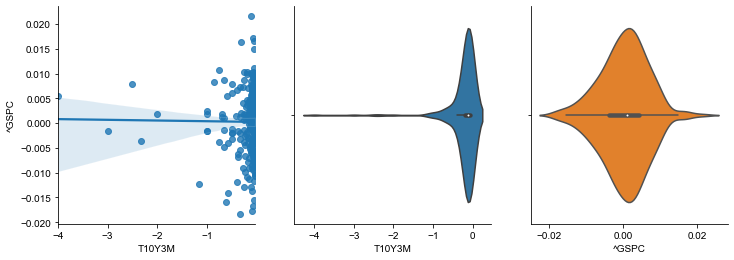

0.06794854253076321
337
-0.036832788671023964
0.0


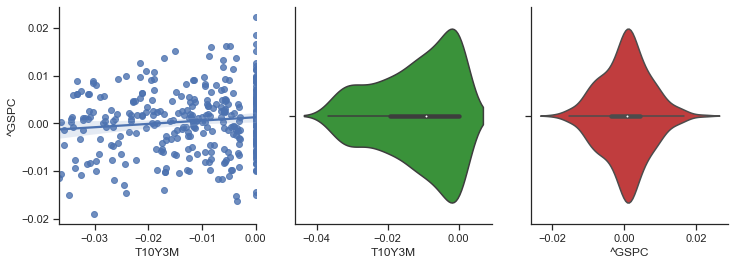

0.14898995398345327
167
0.0
0.02482557091732973


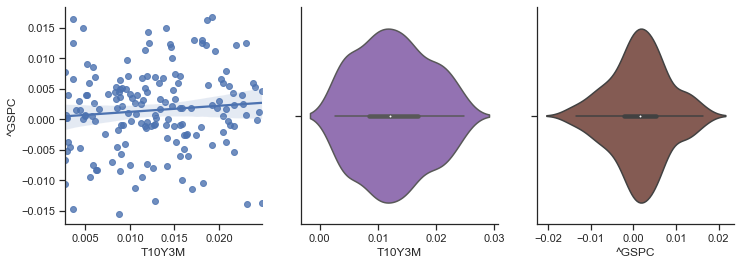

0.24766104746770778
252
0.02482557091732973
5.0


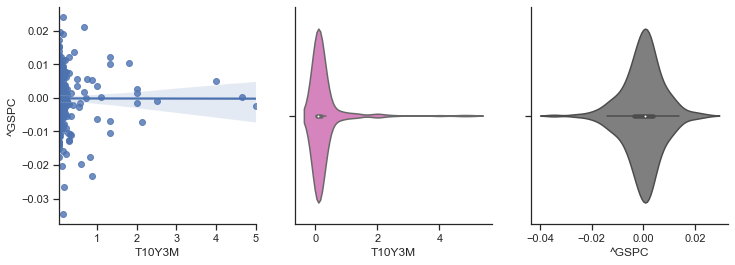

-0.04528230807931821
1
['2004-08-05']
['2008-08-05']
251
-13.0
-0.054337843286591136


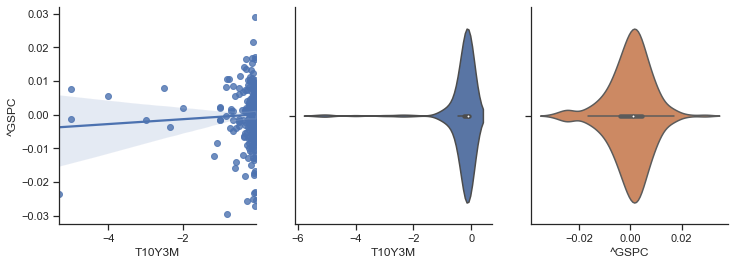

-0.03429643543267524
316
-0.054337843286591136
0.0


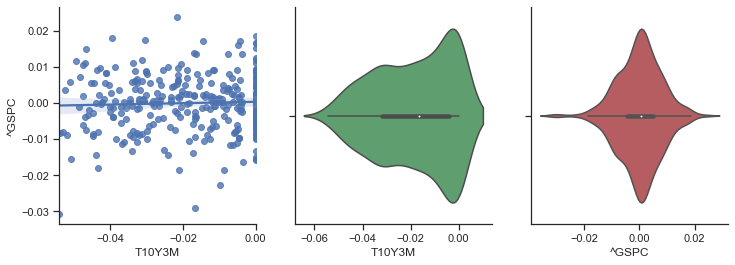

-0.0002677042722158962
188
0.0
0.04662868737318565


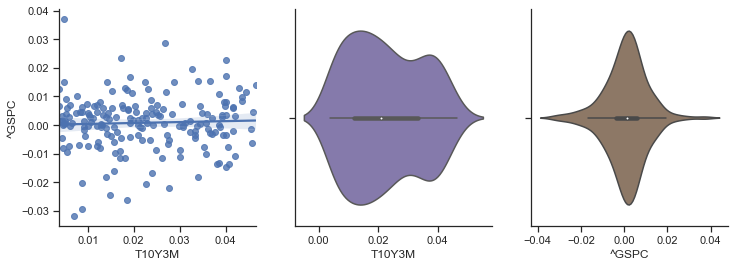

0.14152277057907958
252
0.04662868737318565
5.0


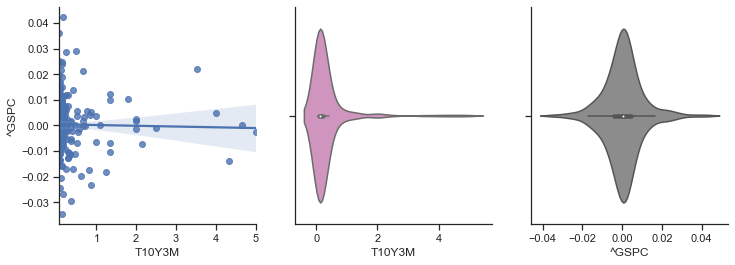

0.08859030664342171
2
['2005-08-04']
['2009-08-05']
251
-13.0
-0.057474436439693216


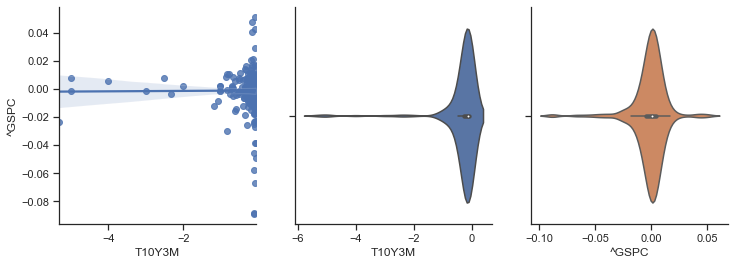

-0.28988449608898237
281
-0.057474436439693216
0.0


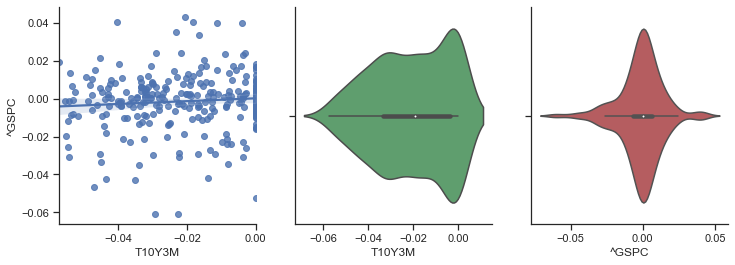

-0.3690254894057454
223
0.0
0.052807017543859636


KeyboardInterrupt: 

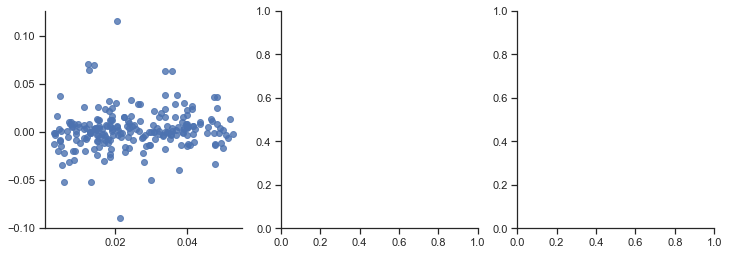

In [223]:
        
for s in range(0,len(sets)):
    print(s)
    set_dates = Training[sets[s]]
    print(set_dates[1])
    print(set_dates[-1])
    
    '''
    
    #raw compare
    filtered1 = pd.concat([truncatedData.loc[[i[0] for i in set_dates]][compare],truncatedData.loc[[i[0] for i in set_dates]][target]],axis=1).dropna()
    quantiles1 = filtered1[compare].quantile(q=[0, .25, .5, .75, 1], interpolation='linear')

    for i in [1,2,3,4]:
        
        dates = filtered1[(filtered1[compare]<=quantiles1.iloc[i]) & (filtered1[compare]>quantiles1.iloc[i-1])].index
        print(quantiles1.iloc[i-1])
        print(quantiles1.iloc[i])
        
        print(len(dates))
        dataframe = filtered1.loc[dates]
        returns = dataframe[target].pct_change().dropna()
        sns.regplot(x=compare, y=target, data=pd.concat([dataframe[compare],returns],axis=1).dropna())
        plt.show()
        sns.violinplot(x=returns,color=next(colors))
        plt.show()
        print(np.cumsum(returns)[-1])
    '''
    
    #rate of change compare
    filtered2 =  pd.concat([truncatedData.loc[[i[0] for i in set_dates]][compare],truncatedData.loc[[i[0] for i in set_dates]][target]],axis=1).pct_change().dropna().replace([np.inf, -np.inf, np.NaN], 0)
    quantiles2 = filtered2[compare].quantile(q=[0, .25, .5, .75, 1], interpolation='linear')

    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = cycle(prop_cycle.by_key()['color'])
    
    for i in [1,2,3,4]:
        dates = filtered2[(filtered2[compare]<=quantiles2.iloc[i]) & (filtered2[compare]>quantiles2.iloc[i-1])].index
        print(len(dates))
        print(quantiles2.iloc[i-1])
        print(quantiles2.iloc[i])

        # make multiple subplots. 
        # you can define the size of figure and dpi (dot per inch, defalt dpi=72)
        #https://medium.com/fullstackai/why-is-plotting-figures-so-difficult-in-python-b3754f5d4c60
        my_dpi = 100
        #fig = plt.figure(figsize=(8, 4), dpi=my_dpi)
        fig, axes = plt.subplots(figsize=(12, 4),ncols=3, nrows=1)
        ax1, ax2, ax3 = axes.ravel()
        sns.set(style="ticks")
        sns.despine(fig=fig)

        # ============ AX1 ============ 
        #ax1 = fig.add_subplot(1,3,1)
        #ax1.set_title("PIL Image")
        #ax1.set_xlabel('X label')
        #ax1.set_ylabel('Y label')
        #ax1.set_xticks([])
        #ax1.set_yticks([])
        
        dataframe = filtered2.loc[dates]
        returns = dataframe[target].dropna()
        sns.regplot(x=compare, y=target, data=dataframe, ax=ax1)
        #plt.show()

        # ============ AX2 ============ 
        # mpimg image
        #ax2 = fig.add_subplot(1,3,2)
        #ax2.set_title("mpimg image")
        #ax2.set_xticks([])
        #ax2.set_yticks([])
        sns.violinplot(x=dataframe[compare].dropna(),color=next(colors), ax=ax2)
        #plt.show()

        # ============ AX3 ============ 
        # CV2 image (default)
        #ax3 = fig.add_subplot(1,3,3)
        #ax3.set_title("CV2 image (default)")
        #ax3.set_xticks([])
        #ax3.set_yticks([])
        sns.violinplot(x=returns,color=next(colors), ax=ax3) 
        plt.show()
       
        print(np.cumsum(returns)[-1])    


1


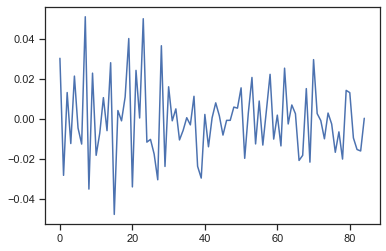

21


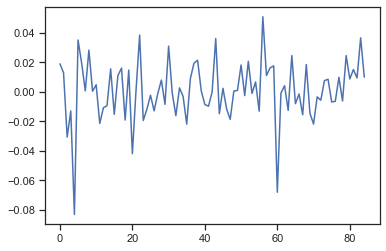

42


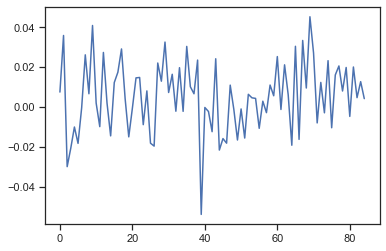

63


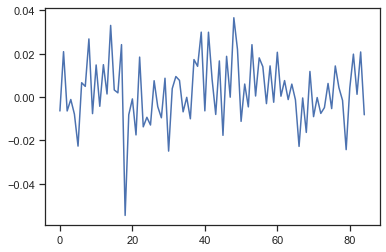

84


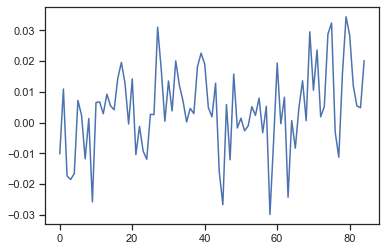

In [224]:
#252 trading days a year
#30 days = 21
#60 = 42
#90 = 63

#return = current - prior / prior

#for i in range(1,63): #[1,21,42,63]
for i in [1,21,42,63,84]: #[1,21,42,84]
    print(i)
    rate_of_change = (truncatedData[compare]-truncatedData[compare].shift(i))/truncatedData[compare].shift(i)
    
    newDF = pd.concat([rate_of_change,truncatedData[target].pct_change()],axis=1).dropna()

    set1 = newDF[compare]
    set2 = newDF[target]
    
    lags = range(0,85) #[0,21,42,63]
    mcorrs_ = []
    mlags = []
    for j in lags:
        
        newSet = pd.concat([set1.shift(j),set2],axis=1).dropna()
      
        mcorrs_.append(np.array(newSet.corr())[1,0])
        
    plt.plot(mcorrs_)
    plt.show()





In [225]:
pd.concat([(truncatedData[compare]-truncatedData[compare].shift(1))/truncatedData[compare].shift(1),truncatedData[target].pct_change().shift(0)],axis=1).dropna().corr()

,T10Y3M,^GSPC
T10Y3M,1.000000,0.030121
^GSPC,0.030121,1.000000


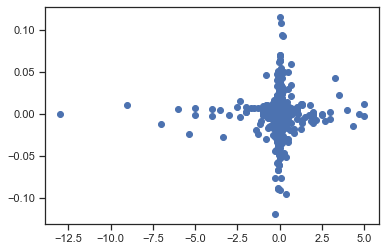

In [227]:
plt.scatter((truncatedData[compare]-truncatedData[compare].shift(1))/truncatedData[compare].shift(1),truncatedData[target].pct_change().shift(0))

In [229]:
#import matplotlib.pyplot as plt
#plt.matshow(
df = combined_set.loc[combined_set.index>=start_date.strftime('%Y-%m-%d')]

r_ = df.corr()

filter = r_[compare]
                       
filter = filter[filter<1]
filter = filter.sort_values(kind="quicksort", ascending=True)
print(filter.head(10))
print(filter.tail(10))


V               -0.805959
CASTHPI         -0.797183
CES4348400001   -0.754903
ILTB            -0.754768
SPCS20RSA       -0.749157
RPL             -0.742677
IYR             -0.727723
REZ             -0.717613
AGZ             -0.704545
VOO             -0.688509
Name: T10Y3M, dtype: float64
TAGS             0.619122
DRSFRMACBS       0.624525
JJU              0.637349
CORN             0.673276
XLC              0.718889
SOYB             0.739370
JJC              0.750574
FXS              0.762948
HOSMEDUSM052N    0.873652
T10Y2Y           0.959511
Name: T10Y3M, dtype: float64
